<a href="https://colab.research.google.com/github/zeinabkamkar98/graph_simulation/blob/main/graph_simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Essential Libs**

In [53]:
import random
import numpy as np

from scipy.special import  rel_entr

import networkx as nx
from networkx.drawing import draw_networkx

**Utils**


In [55]:
def read_graph_file(path):
    G = nx.Graph()
    data = np.loadtxt(path, delimiter=',').astype(int)
    data_tuple = list(map(tuple, data))
    G.add_edges_from(data_tuple)
    return G


def create_random_graph(nodes_count, edges_count, seed ):
    return nx.gnm_random_graph(nodes_count, edges_count, seed=seed)


def add_features_to_graph(G: nx.Graph):
    for node in G.nodes:
        neighbors = G.neighbors(node)
        degrees = [G.degree(neighbor) for neighbor in neighbors]
        min_degree = np.min(degrees) if degrees else 0
        max_degree = np.max(degrees) if degrees else 0
        mean_degree = np.mean(degrees) if degrees else 0
        median_degree = np.median(degrees) if degrees else 0
        G.nodes[node]["features"] = np.array(
            [
                mean_degree,
                median_degree,
                max_degree,
                min_degree,
            ]
        )
    for edge in G.edges:
        G.edges[edge]["features"] = np.zeros(5)
        G.edges[edge]["features"][:2] = (
            G.nodes[edge[0]]["features"][:2] + G.nodes[edge[1]]["features"][:2]
        )

        max_deg = max(G.nodes[edge[0]]["features"][2], G.nodes[edge[1]]["features"][2])
        min_deg = min(G.nodes[edge[0]]["features"][3], G.nodes[edge[1]]["features"][3])
        G.edges[edge]["features"][2] = max_deg
        G.edges[edge]["features"][3] = min_deg
        G.edges[edge]["features"][4] = max_deg -min_deg


def calculate_divergence(g1, g2):
    epsilon = 1e-10

    g1_features_data = np.concatenate(
        [np.array([v]) for v in nx.get_edge_attributes(g1, "features").values()]
    )
    g2_features_data = np.concatenate(
        [np.array([v]) for v in nx.get_edge_attributes(g2, "features").values()]
    )

    feature_divergence = np.zeros(g1_features_data.shape[1])

    g1_hist, _ = np.histogram(g1_features_data[:, 0], range=(2, len(g1.nodes()) * 2))
    g2_hist, _ = np.histogram(g2_features_data[:, 0], range=(2, len(g1.nodes()) * 2))
    feature_divergence[0] = np.sum(
        rel_entr(g1_hist + epsilon / np.sum(g1_hist), g2_hist + epsilon / np.sum(g2_hist))
    )  # mean

    g1_hist, _ = np.histogram(g1_features_data[:, 1], range=(2, len(g1.nodes()) * 2))
    g2_hist, _ = np.histogram(g2_features_data[:, 1], range=(2, len(g1.nodes()) * 2))
    feature_divergence[1] = np.sum(
        rel_entr(g1_hist + epsilon / np.sum(g1_hist), g2_hist + epsilon / np.sum(g2_hist))
    )  # median

    g1_hist, _ = np.histogram(g1_features_data[:, 2], range=(1, len(g1.nodes())))
    g2_hist, _ = np.histogram(g2_features_data[:, 2], range=(1, len(g1.nodes())))
    feature_divergence[2] = np.sum(
        rel_entr(g1_hist + epsilon / np.sum(g1_hist), g2_hist + epsilon / np.sum(g2_hist))
    )  # max

    g1_hist, _ = np.histogram(g1_features_data[:, 3], range=(1, len(g1.nodes())))
    g2_hist, _ = np.histogram(g2_features_data[:, 3], range=(1, len(g1.nodes())))
    feature_divergence[3] = np.sum(
        rel_entr(g1_hist + epsilon / np.sum(g1_hist), g2_hist + epsilon / np.sum(g2_hist))
    )  # min

    g1_hist, _ = np.histogram(g1_features_data[:, 4], range=(0, len(g1.nodes())))
    g2_hist, _ = np.histogram(g2_features_data[:, 4], range=(0, len(g1.nodes())))
    feature_divergence[4] = np.sum(
        rel_entr(g1_hist + epsilon / np.sum(g1_hist), g2_hist + epsilon / np.sum(g2_hist))
    )  # range

    return feature_divergence

**Original Graph**

Generate random graph just for test. Later I will change this part with importing real graph.

None

{(0, 2): {'mean': 4.0, 'median': 4.0, 'max': 3.0, 'min': 1.0, 'range': 2.0},
 (1, 2): {'mean': 4.0, 'median': 4.0, 'max': 3.0, 'min': 1.0, 'range': 2.0},
 (2, 3): {'mean': 4.0, 'median': 4.0, 'max': 3.0, 'min': 1.0, 'range': 2.0}}

{0: '0 mean:3.000 median:3.0 max:3.0 min:3.0',
 1: '1 mean:3.000 median:3.0 max:3.0 min:3.0',
 2: '2 mean:1.000 median:1.0 max:1.0 min:1.0',
 3: '3 mean:3.000 median:3.0 max:3.0 min:3.0'}

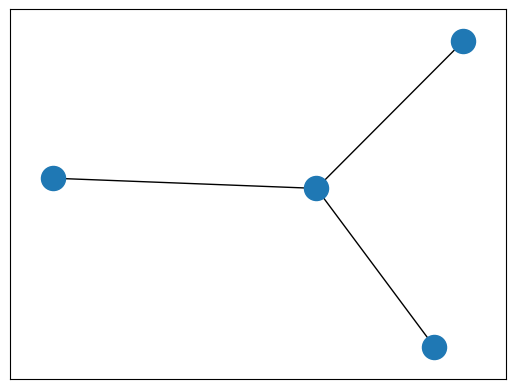

In [60]:
# graph = read_graph_file('KKI_A.txt')

rand = random.Random(0)
graph = create_random_graph(4, 3, rand)
add_features_to_graph(graph)
display(draw_networkx(graph, with_labels=False))

node_labels = {
    node: f"{node} mean:{attr['features'][0]:.3f} median:{attr['features'][1]} max:{attr['features'][2]} min:{attr['features'][3]}"
    for node, attr in graph.nodes(data=True)
}

edge_labels = {
    (u, v): {
        "mean": attr["features"][0],
        "median": attr["features"][1],
        "max": attr["features"][2],
        "min": attr["features"][3],
        "range": attr["features"][4]
    }
    for u, v, attr in graph.edges(data=True)
}

display(edge_labels)
display(node_labels)

**Complement Of Original Graph**


None

{(0, 1): {'mean': 4.0, 'median': 4.0, 'max': 2.0, 'min': 2.0, 'range': 0.0},
 (0, 3): {'mean': 4.0, 'median': 4.0, 'max': 2.0, 'min': 2.0, 'range': 0.0},
 (1, 3): {'mean': 4.0, 'median': 4.0, 'max': 2.0, 'min': 2.0, 'range': 0.0}}

{0: '0 mean:2.000 median:2.0 max:2.0 min:2.0',
 1: '1 mean:2.000 median:2.0 max:2.0 min:2.0',
 2: '2 mean:0.000 median:0 max:0 min:0',
 3: '3 mean:2.000 median:2.0 max:2.0 min:2.0'}

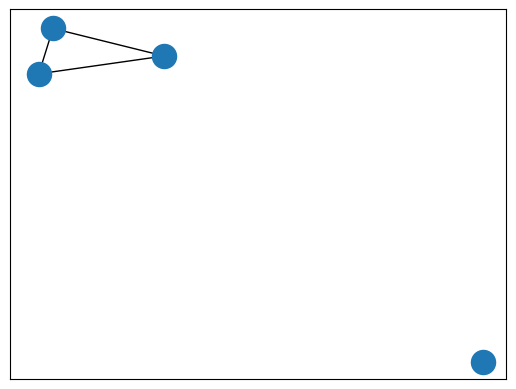

In [61]:
graph_complement = nx.complement(graph)
add_features_to_graph(graph_complement)
display(draw_networkx(graph_complement,  with_labels=False))

node_labels = {
    node: f"{node} mean:{attr['features'][0]:.3f} median:{attr['features'][1]} max:{attr['features'][2]} min:{attr['features'][3]}"
    for node, attr in graph_complement.nodes(data=True)
}

edge_labels = {
    (u, v): {
        "mean": attr["features"][0],
        "median": attr["features"][1],
        "max": attr["features"][2],
        "min": attr["features"][3],
        "range": attr["features"][4]
    }
    for u, v, attr in graph_complement.edges(data=True)
}
display(edge_labels)
display(node_labels)


**Simulate Graph**

In this step, I generated a random graph with same node and edge number of the original graph

In [64]:
rand = random.Random(0)

best_G = None
best_G_div = np.inf
best_G_comp = None
best_G_comp_div = np.inf

for i in range(5):
    random_graph = create_random_graph(len(graph.nodes), len(graph.edges),rand)
    add_features_to_graph(random_graph)
    div = np.sum(calculate_divergence(graph, random_graph))

    if div < best_G_div:
        best_G_div = div
        best_G = random_graph
    print(f"{i}: G", div)

    random_graph_comp = nx.complement(random_graph)
    add_features_to_graph(random_graph_comp)
    div = np.sum(calculate_divergence(graph_complement, random_graph_comp))

    if div < best_G_comp_div:
        best_G_comp_div = div
        best_G_comp = random_graph
    print(f"{i}: G_comp", div)

0: G 0.0
0: G_comp 0.0
1: G 227.00767956559008
1: G_comp 227.00767956559008
2: G 227.00767956559008
2: G_comp 227.00767956559008
3: G 302.6769060858722
3: G_comp 302.6769060858722
4: G 302.6769060858722
4: G_comp 302.6769060858722


0.0


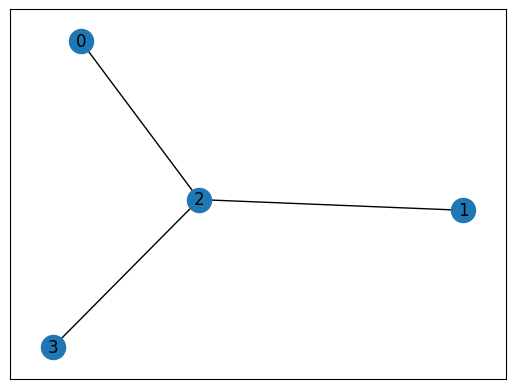

In [65]:
print(best_G_div)
nx.draw_networkx(best_G)